In [1]:
from gettext import install
import dash as dash
import pip
import plotly.express as px
import varclushi as varclushi
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import json
import csv
%matplotlib inline
from sklearn.ensemble import IsolationForest
from tkinter import Tk     # from tkinter import Tk for Python 3.x
from tkinter.filedialog import askopenfilename
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold

C:\Users\RISE\Desktop\Sara\test\venv\lib\site-packages\_distutils_hack\__init__.py:36: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [ ]:
filename = askopenfilename()
print(filename)

In [41]:
#with open(filename) as f:
  # data = json.load(f)

#print(data)
#print('data: ',type(data))
#print(data.keys())
#data['data']
df_cpu = pd.read_json('C:/Users/RISE/Desktop/Sara/Westermo/data-metrics/cpu.json')
df_cpu = pd.DataFrame(df_cpu['data']['result'])
#df.iloc[0]['values']
df_cpu
#data.to_csv(r'C:/Users/RISE/Desktop/Sara/Westermo/data.csv')

,metric,values
0,{'instance': 'abel.test.westermo.com'},"[[1654084800, 2.2499999997671836], [1654088400..."
1,{'instance': 'adam.test.westermo.com'},"[[1654084800, 1.3500000000931323], [1654088400..."
2,{'instance': 'alec.test.westermo.com'},"[[1654084800, 1.7499999998835847], [1654088400..."
3,{'instance': 'amir.test.westermo.com'},"[[1654084800, 1.349999998928979], [1654088400,..."
4,{'instance': 'ari.test.westermo.com'},"[[1654084800, 1.5500000014435358], [1654088400..."
5,{'instance': 'axel.test.westermo.com'},"[[1654084800, 2.999999999301494], [1654088400,..."
6,{'instance': 'ayla.test.westermo.com'},"[[1654084800, 1.4999999990686632], [1654088400..."
7,{'instance': 'bliss.test.westermo.com'},"[[1654084800, 1.1500000004889444], [1654088400..."
8,{'instance': 'carnegie.test.westermo.com'},"[[1654084800, 0.874999999650754], [1654088400,..."
9,{'instance': 'dannybrown.test.westermo.com'},"[[1654084800, 0.8249999996041879], [1654088400..."


In [3]:
df_disk = pd.read_json('C:/Users/RISE/Desktop/Sara/Westermo/data-metrics/disk.json')
df_disk = pd.DataFrame(df_disk['data']['result'])
df_disk

,metric,values
0,"{'device': '/dev/nvme0n1p1', 'fstype': 'ext4',...","[[1654086600, 9.958198659328161], [1654088400,..."
1,"{'device': '/dev/nvme0n1p1', 'fstype': 'ext4',...","[[1654086600, 7.414502546022973], [1654088400,..."
2,"{'device': '/dev/nvme0n1p2', 'fstype': 'ext4',...","[[1654086600, 8.310823552335549], [1654088400,..."
3,"{'device': '/dev/sda1', 'fstype': 'ext4', 'ins...","[[1654086600, 17.765989604482655], [1654088400..."
4,"{'device': '/dev/sda1', 'fstype': 'ext4', 'ins...","[[1654086600, 9.388505512985489], [1654088400,..."
5,"{'device': '/dev/sda1', 'fstype': 'ext4', 'ins...","[[1654086600, 13.732390681142704], [1654088400..."
6,"{'device': '/dev/sda1', 'fstype': 'ext4', 'ins...","[[1654086600, 13.732390681142704], [1654088400..."
7,"{'device': '/dev/sda1', 'fstype': 'ext4', 'ins...","[[1654086600, 13.732390681142704], [1654088400..."
8,"{'device': '/dev/sda1', 'fstype': 'ext4', 'ins...","[[1654086600, 19.87624594736195], [1654088400,..."
9,"{'device': '/dev/sda1', 'fstype': 'ext4', 'ins...","[[1654086600, 8.730404206156123], [1654088400,..."


In [11]:
df_load = pd.read_json('C:/Users/RISE/Desktop/Sara/Westermo/data-metrics/load.json')
df_load = pd.DataFrame(df_load['data']['result'])
df_load

,metric,values
0,"{'__name__': 'node_load1', 'instance': 'abel.t...","[[1654084800, 0.01], [1654088400, 0], [1654092..."
1,"{'__name__': 'node_load1', 'instance': 'adam.t...","[[1654084800, 0.03], [1654088400, 0], [1654092..."
2,"{'__name__': 'node_load1', 'instance': 'alec.t...","[[1654084800, 0.06], [1654088400, 0.03], [1654..."
3,"{'__name__': 'node_load1', 'instance': 'amir.t...","[[1654084800, 0], [1654088400, 0.29], [1654092..."
4,"{'__name__': 'node_load1', 'instance': 'ari.te...","[[1654084800, 0.02], [1654088400, 0], [1654092..."
5,"{'__name__': 'node_load1', 'instance': 'axel.t...","[[1654084800, 0.14], [1654088400, 0.06], [1654..."
6,"{'__name__': 'node_load1', 'instance': 'ayla.t...","[[1654084800, 0.01], [1654088400, 0.04], [1654..."
7,"{'__name__': 'node_load1', 'instance': 'bliss....","[[1654084800, 0.2], [1654088400, 0.38], [16540..."
8,"{'__name__': 'node_load1', 'instance': 'carneg...","[[1654084800, 0.03], [1654088400, 0.02], [1654..."
9,"{'__name__': 'node_load1', 'instance': 'dannyb...","[[1654084800, 0], [1654088400, 0.08], [1654092..."


In [19]:
df_memory = pd.read_json('C:/Users/RISE/Desktop/Sara/Westermo/data-metrics/memory.json')
df_memory = pd.DataFrame(df_memory['data']['result'])
df_memory

,metric,values
0,"{'instance': 'abel.test.westermo.com', 'job': ...","[[1654084800, 4.896697772709937], [1654088400,..."
1,"{'instance': 'adam.test.westermo.com', 'job': ...","[[1654084800, 2.733867638496455], [1654088400,..."
2,"{'instance': 'alec.test.westermo.com', 'job': ...","[[1654084800, 4.53292799185238], [1654088400, ..."
3,"{'instance': 'amir.test.westermo.com', 'job': ...","[[1654084800, 5.2876244064926485], [1654088400..."
4,"{'instance': 'ari.test.westermo.com', 'job': '...","[[1654084800, 2.109592435528635], [1654088400,..."
5,"{'instance': 'axel.test.westermo.com', 'job': ...","[[1654084800, 12.302419487213157], [1654088400..."
6,"{'instance': 'ayla.test.westermo.com', 'job': ...","[[1654084800, 10.847302302493413], [1654088400..."
7,"{'instance': 'bliss.test.westermo.com', 'job':...","[[1654084800, 11.922828686854627], [1654088400..."
8,"{'instance': 'carnegie.test.westermo.com', 'jo...","[[1654084800, 9.195482550355274], [1654088400,..."
9,"{'instance': 'dannybrown.test.westermo.com', '...","[[1654084800, 11.762249946411178], [1654088400..."


In [4]:
disk = []
for i in range(0,len(df_disk.iloc[0]['values'])):
      disk.append(float(df_disk.iloc[0]['values'][i][1])) # why float dose not wor properly here!?
print(disk)

[9.958198659328161, 9.958202021835035, 9.958203703088486, 9.958207065595388, 9.958212109355713, 9.958212109355713, 9.958215471862601, 9.95821967499623, 9.95821967499623, 9.958260025078928, 9.958264228212528, 9.844759445584486, 9.848385909266923, 9.852469673886603, 9.859371219281314, 9.863245667846996, 9.867448801461322, 9.870844092794968, 9.872105873505987, 9.87670242042661, 9.88287430182588, 9.888510704002684, 9.891627747891079, 9.897284325109226, 9.902397857464408, 9.907054088882347, 9.910508224086598, 9.916227007682252, 9.921124498969661, 9.926143881131892, 9.934925067878936, 9.940029353340165, 9.943804607952544, 9.943807970459446, 9.943812173593045, 9.943812173593045, 9.943817217353384, 9.943820579860272, 9.943820579860272, 9.943824782993886, 9.943828145500788, 9.943828145500788, 9.943834870514564, 9.943839073648192, 9.943839073648192, 9.943842436155066, 9.943845798661968, 9.943845798661968, 9.943850842422293, 9.943854204929195, 9.943855045555921, 9.943859248689535, 9.9438642924498

In [13]:
load = []
for i in range(0,len(df_load.iloc[0]['values'])):
      load.append(float(df_load.iloc[0]['values'][i][1]))
print(load)

[0.01, 0.0, 0.0, 0.01, 0.19, 0.0, 0.06, 0.13, 0.14, 0.06, 0.19, 0.08, 0.05, 0.11, 0.2, 0.1, 0.3, 0.01, 0.24, 0.02, 0.12, 0.02, 0.0, 0.0, 0.06, 0.0, 0.01, 0.0, 0.04, 0.07, 0.94, 0.16, 0.0, 0.05, 0.26, 0.0, 0.08, 0.18, 0.0, 0.0, 0.1, 0.06, 0.01, 0.0, 0.13, 0.02, 0.05, 0.0, 0.0, 0.07, 0.0, 0.24, 0.24, 0.09, 0.0, 0.04, 0.19, 0.01, 0.02, 0.03, 0.07, 0.12, 0.16, 0.08, 0.07, 0.01, 0.03, 0.1, 0.16, 0.11, 0.15, 0.13, 0.0, 0.05, 0.29, 0.06, 0.06, 0.09, 0.08, 0.04, 0.14, 0.0, 0.08, 0.0, 0.07, 0.02, 0.13, 0.09, 0.02, 0.01, 0.18, 0.32, 0.06, 0.48, 0.0, 0.0, 0.0, 0.06, 0.06, 0.01, 0.0, 0.34, 0.06, 0.2, 0.1, 0.17, 0.18, 0.16, 0.0, 0.0, 0.11, 0.02, 0.01, 0.1, 0.07, 0.0, 0.02, 0.01, 0.02, 0.07, 0.03, 0.09, 0.11, 0.1, 0.06, 0.0, 0.08, 0.14, 0.05, 0.14, 0.06, 0.19, 0.04, 0.34, 0.07, 0.09, 0.44, 0.02, 0.0, 0.02, 0.1, 0.0, 0.08, 0.16, 0.23, 0.02, 0.12, 0.09, 0.03, 0.07, 0.01, 0.04, 0.15, 0.08, 0.09, 0.12, 0.16, 0.01, 0.0, 0.3, 0.11, 0.02, 0.08, 0.09, 0.05, 0.04, 0.0, 0.0, 0.03, 0.89, 0.0, 0.0, 0.0, 0.03, 0

In [20]:
memory = []
for i in range(0,len(df_memory.iloc[0]['values'])):
      memory.append(float(df_memory.iloc[0]['values'][i][1]))
print(memory)

[4.896697772709937, 4.897018487479542, 4.892059743734096, 4.891541666029349, 4.8951188692288, 4.892923206575343, 5.751353292975903, 5.865675773156964, 5.839377162049279, 6.112305430983909, 5.930805541753855, 5.902508630927858, 5.848061131195531, 5.962309600275914, 6.001190098498907, 6.193890334298273, 6.049420665774257, 4.932741178740262, 4.926721609218427, 4.94781477291174, 4.9343940933220765, 4.929336668109061, 4.939969596239841, 4.933678652682187, 4.928744579303634, 4.978603390793907, 4.961112100666939, 4.936022337537, 4.935257556163323, 4.945347736222463, 5.76053066946001, 5.9076894079753375, 5.966873618151074, 5.9601632783562435, 5.977827261051461, 5.96692295888486, 5.897549887182412, 6.1776572328828365, 6.238864413143779, 6.0805546687929235, 6.08373714612209, 5.020937740381887, 5.012253771235635, 5.013413278479595, 5.014696137558019, 5.0223932920285606, 5.010946241790318, 5.010132119682857, 5.031545998145775, 5.020987081115673, 5.0576225759514255, 5.0181746592898975, 5.9064558896

In [16]:
length = []
for i in range(0,21) :
 length.append(len(df_disk.iloc[i]['values']))
print(length)
#df.iloc[1]['values'][1][1]

[1259, 1296, 1296, 1296, 1296, 1295, 1295, 1295, 1296, 1296, 1293, 1295, 1296, 1296, 1296, 1296, 1294, 1296, 1165, 1296, 1164]


In [15]:
length = []
for i in range(0,19) :
 length.append(len(df_load.iloc[i]['values']))
print(length)

[649, 649, 648, 649, 649, 648, 648, 649, 649, 649, 649, 649, 631, 648, 649, 649, 583, 649, 583]


In [21]:
length = []
for i in range(0,19) :
 length.append(len(df_memory.iloc[i]['values']))
print(length)

[649, 649, 648, 649, 649, 648, 648, 649, 649, 649, 649, 649, 631, 648, 649, 649, 583, 649, 583]


In [42]:
df_cpu2 = pd.DataFrame()
for j in range(0,19):
    temp = []
    for i in range(0,583):
        temp.append(float(df_cpu.iloc[j]['values'][i][1]))
    df_cpu2.insert(j, str(j), temp, True)
df_cpu2.columns = ['cpu.abel', 'cpu.adam', 'cpu.alec', 'cpu.amir', 'cpu.ari', 'cpu.axel', 'cpu.ayla', 'cpu.bliss', 'cpu.carnegie',
               'cpu.dannybrown', 'cpu.eden', 'cpu.elis', 'cpu.emma', 'cpu.eric', 'cpu.erin', 'cpu.etta', 'cpu.mrhutchinson',
               'cpu.raylenemiles', 'cpu.thewareings']
df_cpu2

,cpu.abel,cpu.adam,cpu.alec,cpu.amir,cpu.ari,cpu.axel,cpu.ayla,cpu.bliss,cpu.carnegie,cpu.dannybrown,cpu.eden,cpu.elis,cpu.emma,cpu.eric,cpu.erin,cpu.etta,cpu.mrhutchinson,cpu.raylenemiles,cpu.thewareings
0,2.250,1.3500,1.75,1.350,1.5500,3.00,1.500,1.1500,0.8750,0.8250,1.250,0.675000,0.550000,0.9500,0.766667,0.800000,0.5500,0.9750,0.5250
1,1.450,1.4250,1.45,1.500,1.4250,1.95,2.500,1.2750,0.7500,0.9500,2.650,0.700000,0.416667,1.2250,0.816667,0.650000,0.4000,0.6250,0.7250
2,1.650,1.2000,1.35,1.600,1.2500,1.80,1.600,1.0000,1.2500,1.0750,2.600,0.950000,0.616667,0.7750,0.700000,0.733333,0.8500,0.8500,0.9750
3,1.600,1.3000,1.15,2.550,1.1750,2.05,1.250,0.9500,0.8000,1.0500,1.300,0.779376,0.600000,0.7750,0.350000,0.866667,0.5000,0.8750,0.6250
4,1.350,1.2750,1.35,1.250,0.7500,3.10,1.800,1.5000,0.7250,0.3500,0.950,0.600000,0.683333,1.4500,0.666667,0.683333,0.3750,0.5750,0.8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.675,1.0625,1.75,1.725,1.1375,2.90,1.850,1.0375,0.7375,0.4375,1.075,0.600000,0.566667,0.7750,0.566667,0.625000,0.9625,0.5500,0.9125
579,1.800,1.1750,1.35,1.700,1.1125,2.70,1.825,1.0250,0.8250,0.4750,1.025,0.462500,0.433333,1.0125,0.641667,0.625000,0.6500,0.6000,0.5625
580,2.025,1.0375,1.60,1.825,1.2750,3.05,1.600,1.7000,0.8000,0.5500,1.375,1.375000,0.566667,0.7625,0.566667,0.533333,0.4625,0.6125,0.5875
581,6.300,1.5375,7.55,2.750,19.6250,2.30,1.900,1.5750,1.1375,0.6000,0.800,0.650000,0.575000,1.8500,0.833333,1.158333,1.2750,0.6000,0.9125


In [5]:
df_disk2 = pd.DataFrame()
for j in range(0,21):
    temp2 = []
    for i in range(0,1164):
        temp2.append(float(df_disk.iloc[j]['values'][i][1]))
    df_disk2.insert(j, str(j), temp2, True)
df_disk2.columns = ['disk.emma', 'disk.erin', 'disk.etta', 'disk.abel', 'disk.adam', 'disk.alec', 'disk.alec2', 'disk.alec3','disk.amir', 'disk.ari',
               'disk.axel', 'disk.ayla', 'disk.bliss', 'disk.dannybrown', 'disk.eden', 'disk.elis', 'disk.eric', 'disk.raylenemiles',
               'disk.thewareings', 'disk.carnegie','mrhutchinson']
df_disk2

,disk.emma,disk.erin,disk.etta,disk.abel,disk.adam,disk.alec,disk.alec2,disk.alec3,disk.amir,disk.ari,...,disk.ayla,disk.bliss,disk.dannybrown,disk.eden,disk.elis,disk.eric,disk.raylenemiles,disk.thewareings,disk.carnegie,mrhutchinson
0,9.958199,7.414503,8.310824,17.765990,9.388506,13.732391,13.732391,13.732391,19.876246,8.730404,...,10.343812,7.238187,30.300574,24.334351,9.359844,15.663889,18.699789,10.626132,38.425478,8.127003
1,9.958202,7.414507,8.310828,17.765990,9.388506,13.732392,13.732392,13.732392,19.876246,8.730404,...,10.343820,7.238192,30.303676,24.335702,9.359850,15.663890,18.699803,10.626139,38.425703,8.127007
2,9.958204,7.414508,8.310831,17.765995,9.388506,13.732392,13.732392,13.732392,19.876249,8.730406,...,10.343828,7.238199,30.305139,24.336166,9.359857,15.663890,18.699820,10.626147,38.425705,8.127011
3,9.958207,7.413972,8.310831,17.765998,9.388506,13.732394,13.732394,13.732394,19.876249,8.730407,...,10.343836,7.238205,30.307890,24.336518,9.359863,15.663890,18.699836,10.626155,38.425705,8.127015
4,9.958212,7.436920,8.310835,17.766004,9.388507,13.732396,13.732396,13.732396,19.876249,8.730407,...,10.343844,7.238211,30.309086,24.336974,9.359870,15.663890,18.699851,10.626162,38.426357,8.127018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,10.804812,8.149323,8.533358,18.417372,9.376468,14.113511,14.113511,14.113511,20.387144,9.129873,...,10.249139,7.371989,33.211995,25.209852,9.452653,15.464426,19.228367,10.098539,38.739107,8.174381
1160,10.804816,8.074194,8.438991,18.173317,9.274191,14.120933,14.120933,14.120933,20.161752,9.072197,...,10.276792,7.303052,32.927583,25.078696,9.410145,15.475201,18.871271,10.098546,38.644955,8.174385
1161,10.804820,8.080027,8.443820,18.183807,9.278825,14.129962,14.129962,14.129962,20.170145,9.075713,...,10.285329,7.307064,32.946588,25.078735,9.411875,15.483709,18.891690,10.098553,38.654884,8.182495
1162,10.804820,8.081589,8.445471,18.189284,9.281226,14.147201,14.147201,14.147201,20.178140,9.078545,...,10.291338,7.309738,32.956202,25.078735,9.414890,15.489663,18.902429,10.098561,38.662055,8.184588


In [6]:
# Test alec were repeated three times
disk_final = df_disk2.drop(columns=['disk.alec2', 'disk.alec3'])
disk_final

,disk.emma,disk.erin,disk.etta,disk.abel,disk.adam,disk.alec,disk.amir,disk.ari,disk.axel,disk.ayla,disk.bliss,disk.dannybrown,disk.eden,disk.elis,disk.eric,disk.raylenemiles,disk.thewareings,disk.carnegie,mrhutchinson
0,9.958199,7.414503,8.310824,17.765990,9.388506,13.732391,19.876246,8.730404,7.402206,10.343812,7.238187,30.300574,24.334351,9.359844,15.663889,18.699789,10.626132,38.425478,8.127003
1,9.958202,7.414507,8.310828,17.765990,9.388506,13.732392,19.876246,8.730404,7.402212,10.343820,7.238192,30.303676,24.335702,9.359850,15.663890,18.699803,10.626139,38.425703,8.127007
2,9.958204,7.414508,8.310831,17.765995,9.388506,13.732392,19.876249,8.730406,7.402217,10.343828,7.238199,30.305139,24.336166,9.359857,15.663890,18.699820,10.626147,38.425705,8.127011
3,9.958207,7.413972,8.310831,17.765998,9.388506,13.732394,19.876249,8.730407,7.402225,10.343836,7.238205,30.307890,24.336518,9.359863,15.663890,18.699836,10.626155,38.425705,8.127015
4,9.958212,7.436920,8.310835,17.766004,9.388507,13.732396,19.876249,8.730407,7.402231,10.343844,7.238211,30.309086,24.336974,9.359870,15.663890,18.699851,10.626162,38.426357,8.127018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,10.804812,8.149323,8.533358,18.417372,9.376468,14.113511,20.387144,9.129873,7.435137,10.249139,7.371989,33.211995,25.209852,9.452653,15.464426,19.228367,10.098539,38.739107,8.174381
1160,10.804816,8.074194,8.438991,18.173317,9.274191,14.120933,20.161752,9.072197,7.436679,10.276792,7.303052,32.927583,25.078696,9.410145,15.475201,18.871271,10.098546,38.644955,8.174385
1161,10.804820,8.080027,8.443820,18.183807,9.278825,14.129962,20.170145,9.075713,7.438866,10.285329,7.307064,32.946588,25.078735,9.411875,15.483709,18.891690,10.098553,38.654884,8.182495
1162,10.804820,8.081589,8.445471,18.189284,9.281226,14.147201,20.178140,9.078545,7.439376,10.291338,7.309738,32.956202,25.078735,9.414890,15.489663,18.902429,10.098561,38.662055,8.184588


In [16]:
df_load2 = pd.DataFrame()
for j in range(0,19):
    temp3 = []
    for i in range(0,583):
        temp3.append(float(df_load.iloc[j]['values'][i][1]))
    df_load2.insert(j, str(j), temp3, True)
df_load2.columns = ['load.abel', 'load.adam', 'load.alec', 'load.amir', 'load.ari', 'load.axel', 'load.ayla', 'load.bliss', 'load.carnegie',
               'load.dannybrown', 'load.eden', 'load.elis', 'load.emma', 'load.eric', 'load.erin', 'load.etta', 'load.mrhutchinson',
               'load.raylenemiles', 'load.thewareings']
df_load2

,load.abel,load.adam,load.alec,load.amir,load.ari,load.axel,load.ayla,load.bliss,load.carnegie,load.dannybrown,load.eden,load.elis,load.emma,load.eric,load.erin,load.etta,load.mrhutchinson,load.raylenemiles,load.thewareings
0,0.01,0.03,0.06,0.00,0.02,0.14,0.01,0.20,0.03,0.00,0.00,0.00,0.02,0.00,0.00,0.01,0.00,0.00,0.00
1,0.00,0.00,0.03,0.29,0.00,0.06,0.04,0.38,0.02,0.08,0.16,0.00,0.06,1.57,0.13,0.00,0.10,0.05,0.07
2,0.00,0.02,0.12,0.02,0.09,0.02,0.02,0.24,0.05,0.00,0.03,0.00,0.00,0.00,0.12,0.00,0.05,0.00,0.00
3,0.01,0.05,0.05,0.00,0.01,0.16,0.15,0.03,0.00,0.00,0.00,0.00,0.34,0.09,0.01,0.30,0.27,0.00,0.00
4,0.19,0.16,0.06,0.09,0.08,0.00,0.02,0.15,0.00,0.00,0.12,0.02,0.00,0.24,0.14,0.00,0.10,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,0.55,0.01,0.00,0.05,0.05,0.25,0.01,0.04,0.16,0.00,0.00,0.01,0.08,0.09,0.02,0.23,0.00,0.00,0.01
579,0.07,0.00,0.01,0.03,0.12,0.72,0.00,0.02,0.05,0.15,0.00,0.00,0.01,0.42,0.00,0.02,0.00,0.00,0.07
580,0.00,0.00,0.03,0.02,0.06,0.15,0.12,0.10,0.15,0.00,0.12,0.06,0.14,0.25,0.00,0.00,0.12,0.02,0.04
581,0.01,0.03,0.05,0.33,1.62,0.10,0.08,0.18,0.32,0.01,0.03,0.13,0.00,0.09,0.06,0.13,0.01,0.04,0.11


In [22]:
df_memory2 = pd.DataFrame()
for j in range(0,19):
    temp4 = []
    for i in range(0,583):
        temp4.append(float(df_memory.iloc[j]['values'][i][1]))
    df_memory2.insert(j, str(j), temp4, True)
df_memory2.columns = ['memory.abel', 'memory.adam', 'memory.alec', 'memory.amir', 'memory.ari', 'memory.axel', 'memory.ayla', 'memory.bliss', 'memory.carnegie',
               'memory.dannybrown', 'memory.eden', 'memory.elis', 'memory.emma', 'memory.eric', 'memory.erin', 'memory.etta', 'memory.mrhutchinson',
               'memory.raylenemiles', 'memory.thewareings']
df_memory2

,memory.abel,memory.adam,memory.alec,memory.amir,memory.ari,memory.axel,memory.ayla,memory.bliss,memory.carnegie,memory.dannybrown,memory.eden,memory.elis,memory.emma,memory.eric,memory.erin,memory.etta,memory.mrhutchinson,memory.raylenemiles,memory.thewareings
0,4.896698,2.733868,4.532928,5.287624,2.109592,12.302419,10.847302,11.922829,9.195483,11.762250,10.329986,10.256296,4.967840,10.469826,4.397685,6.619926,11.959589,9.972721,10.350662
1,4.897018,2.734099,4.535568,5.310000,2.110943,12.313713,10.829789,11.938324,9.424330,13.657792,11.854901,10.235116,4.982571,10.481776,4.391984,6.645199,11.975781,9.966391,10.332841
2,4.892060,2.729766,4.534260,5.292707,2.110104,12.281081,10.837374,11.964718,9.409997,13.611102,12.149936,10.271708,4.973776,10.505675,2.479691,6.631230,12.016618,9.947347,10.333300
3,4.891542,2.730801,4.530559,5.311727,2.102874,12.348839,10.827141,11.989865,9.308352,11.833634,10.346634,10.260273,4.977939,10.472452,2.871488,6.613978,11.946401,9.983763,10.383095
4,4.895119,2.730460,4.538306,5.299417,2.110067,12.316733,10.842415,11.944364,9.306008,11.871006,10.332888,10.283540,4.985822,10.490705,2.863443,6.632439,12.005925,9.949120,10.346079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,4.392435,2.269450,4.124264,4.419795,2.091969,11.733167,10.193491,11.507282,8.246366,12.442739,8.645004,9.893511,5.371854,11.072235,4.541275,5.571804,13.970871,10.829823,8.953534
579,4.400034,2.275572,4.133689,4.415601,2.092456,11.719904,10.227806,11.520019,8.263414,12.454042,8.682984,9.890976,5.366213,11.035072,4.539547,5.580664,12.317495,10.827594,8.892944
580,4.389154,2.273637,5.096556,4.432031,2.087186,14.824727,12.760879,11.548252,8.265116,12.419776,8.661295,9.907333,5.386733,14.750439,4.531797,5.578937,12.298146,10.819643,8.900836
581,5.378831,2.786226,5.182463,5.423583,2.653667,15.027149,12.974506,14.587477,9.492570,14.804822,8.662619,12.542129,5.362025,14.856279,5.542327,6.899289,14.020109,13.000457,8.899258


In [54]:
time_memory = pd.DataFrame()
for j in range(0,19):
    temp = []
    for i in range(0,583):
        temp.append(df_memory.iloc[j]['values'][i][0])
    time_memory.insert(j, str(j), temp, True)
time_memory.columns = ['t.memory.abel', 't.memory.adam', 't.memory.alec', 't.memory.amir', 't.memory.ari', 't.memory.axel', 't.memory.ayla', 't.memory.bliss', 't.memory.carnegie',
               't.memory.dannybrown', 't.memory.eden', 't.memory.elis', 't.memory.emma', 't.memory.eric', 't.memory.erin', 't.memory.etta', 't.memory.mrhutchinson',
               't.memory.raylenemiles', 't.memory.thewareings']
time_memory

,t.memory.abel,t.memory.adam,t.memory.alec,t.memory.amir,t.memory.ari,t.memory.axel,t.memory.ayla,t.memory.bliss,t.memory.carnegie,t.memory.dannybrown,t.memory.eden,t.memory.elis,t.memory.emma,t.memory.eric,t.memory.erin,t.memory.etta,t.memory.mrhutchinson,t.memory.raylenemiles,t.memory.thewareings
0,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800
1,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400
2,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000
3,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600
4,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1656165600,1656165600,1656169200,1656165600,1656165600,1656169200,1656169200,1656165600,1656165600,1656165600,1656165600,1656165600,1656230400,1656169200,1656165600,1656165600,1656403200,1656165600,1656403200
579,1656169200,1656169200,1656172800,1656169200,1656169200,1656172800,1656172800,1656169200,1656169200,1656169200,1656169200,1656169200,1656234000,1656172800,1656169200,1656169200,1656406800,1656169200,1656406800
580,1656172800,1656172800,1656176400,1656172800,1656172800,1656176400,1656176400,1656172800,1656172800,1656172800,1656172800,1656172800,1656237600,1656176400,1656172800,1656172800,1656410400,1656172800,1656410400
581,1656176400,1656176400,1656180000,1656176400,1656176400,1656180000,1656180000,1656176400,1656176400,1656176400,1656176400,1656176400,1656241200,1656180000,1656176400,1656176400,1656414000,1656176400,1656414000


In [53]:
time_load = pd.DataFrame()
for j in range(0,19):
    temp = []
    for i in range(0,583):
        temp.append(df_load.iloc[j]['values'][i][0])
    time_load.insert(j, str(j), temp, True)
time_load.columns = ['t.load.abel', 't.load.adam', 't.load.alec', 't.load.amir', 't.load.ari', 't.load.axel', 't.load.ayla', 't.load.bliss', 't.load.carnegie',
               't.load.dannybrown', 't.load.eden', 't.load.elis', 't.load.emma', 't.load.eric', 't.load.erin', 't.load.etta', 't.load.mrhutchinson',
               't.load.raylenemiles', 't.load.thewareings']
time_load

,t.load.abel,t.load.adam,t.load.alec,t.load.amir,t.load.ari,t.load.axel,t.load.ayla,t.load.bliss,t.load.carnegie,t.load.dannybrown,t.load.eden,t.load.elis,t.load.emma,t.load.eric,t.load.erin,t.load.etta,t.load.mrhutchinson,t.load.raylenemiles,t.load.thewareings
0,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800
1,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400
2,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000
3,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600
4,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1656165600,1656165600,1656169200,1656165600,1656165600,1656169200,1656169200,1656165600,1656165600,1656165600,1656165600,1656165600,1656230400,1656169200,1656165600,1656165600,1656403200,1656165600,1656403200
579,1656169200,1656169200,1656172800,1656169200,1656169200,1656172800,1656172800,1656169200,1656169200,1656169200,1656169200,1656169200,1656234000,1656172800,1656169200,1656169200,1656406800,1656169200,1656406800
580,1656172800,1656172800,1656176400,1656172800,1656172800,1656176400,1656176400,1656172800,1656172800,1656172800,1656172800,1656172800,1656237600,1656176400,1656172800,1656172800,1656410400,1656172800,1656410400
581,1656176400,1656176400,1656180000,1656176400,1656176400,1656180000,1656180000,1656176400,1656176400,1656176400,1656176400,1656176400,1656241200,1656180000,1656176400,1656176400,1656414000,1656176400,1656414000


In [62]:
time_disk = pd.DataFrame()
for j in range(0,21):
    temp = []
    for i in range(0,1164):
        temp.append(df_disk.iloc[j]['values'][i][0])
    time_disk.insert(j, str(j), temp, True)
time_disk.columns = ['t.disk.emma', 't.disk.erin', 't.disk.etta', 't.disk.abel', 't.disk.adam', 't.disk.alec', 't.disk.alec2', 't.disk.alec3','t.disk.amir', 't.disk.ari',
               't.disk.axel', 't.disk.ayla', 't.disk.bliss', 't.disk.dannybrown', 't.disk.eden', 't.disk.elis', 't.disk.eric', 't.disk.raylenemiles',
               't.disk.thewareings', 't.disk.carnegie','t.disk.mrhutchinson']
time_disk

,t.disk.emma,t.disk.erin,t.disk.etta,t.disk.abel,t.disk.adam,t.disk.alec,t.disk.alec2,t.disk.alec3,t.disk.amir,t.disk.ari,...,t.disk.ayla,t.disk.bliss,t.disk.dannybrown,t.disk.eden,t.disk.elis,t.disk.eric,t.disk.raylenemiles,t.disk.thewareings,t.disk.carnegie,t.disk.mrhutchinson
0,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,...,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600
1,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,...,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400
2,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,...,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200
3,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,...,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000
4,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,...,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,1656239400,1656172800,1656172800,1656172800,1656172800,1656174600,1656174600,1656174600,1656172800,1656172800,...,1656174600,1656172800,1656172800,1656172800,1656172800,1656176400,1656172800,1656408600,1656172800,1656410400
1160,1656241200,1656174600,1656174600,1656174600,1656174600,1656176400,1656176400,1656176400,1656174600,1656174600,...,1656176400,1656174600,1656174600,1656174600,1656174600,1656178200,1656174600,1656410400,1656174600,1656412200
1161,1656243000,1656176400,1656176400,1656176400,1656176400,1656178200,1656178200,1656178200,1656176400,1656176400,...,1656178200,1656176400,1656176400,1656176400,1656176400,1656180000,1656176400,1656412200,1656176400,1656414000
1162,1656244800,1656178200,1656178200,1656178200,1656178200,1656180000,1656180000,1656180000,1656178200,1656178200,...,1656180000,1656178200,1656178200,1656178200,1656178200,1656181800,1656178200,1656414000,1656178200,1656415800


In [64]:
disk_time = time_disk.drop(columns=['t.disk.alec2', 't.disk.alec3'])
disk_time

,t.disk.emma,t.disk.erin,t.disk.etta,t.disk.abel,t.disk.adam,t.disk.alec,t.disk.amir,t.disk.ari,t.disk.axel,t.disk.ayla,t.disk.bliss,t.disk.dannybrown,t.disk.eden,t.disk.elis,t.disk.eric,t.disk.raylenemiles,t.disk.thewareings,t.disk.carnegie,t.disk.mrhutchinson
0,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600,1654086600
1,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400
2,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200,1654090200
3,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000
4,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800,1654093800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,1656239400,1656172800,1656172800,1656172800,1656172800,1656174600,1656172800,1656172800,1656178200,1656174600,1656172800,1656172800,1656172800,1656172800,1656176400,1656172800,1656408600,1656172800,1656410400
1160,1656241200,1656174600,1656174600,1656174600,1656174600,1656176400,1656174600,1656174600,1656180000,1656176400,1656174600,1656174600,1656174600,1656174600,1656178200,1656174600,1656410400,1656174600,1656412200
1161,1656243000,1656176400,1656176400,1656176400,1656176400,1656178200,1656176400,1656176400,1656181800,1656178200,1656176400,1656176400,1656176400,1656176400,1656180000,1656176400,1656412200,1656176400,1656414000
1162,1656244800,1656178200,1656178200,1656178200,1656178200,1656180000,1656178200,1656178200,1656183600,1656180000,1656178200,1656178200,1656178200,1656178200,1656181800,1656178200,1656414000,1656178200,1656415800


In [51]:
time_cpu = pd.DataFrame()
for j in range(0,19):
    temp = []
    for i in range(0,583):
        temp.append(df_cpu.iloc[j]['values'][i][0])
    time_cpu.insert(j, str(j), temp, True)
time_cpu.columns = ['t.cpu.abel', 't.cpu.adam', 't.cpu.alec', 't.cpu.amir', 't.cpu.ari', 't.cpu.axel', 't.cpu.ayla', 't.cpu.bliss', 't.cpu.carnegie',
               't.cpu.dannybrown', 't.cpu.eden', 't.cpu.elis', 't.cpu.emma', 't.cpu.eric', 't.cpu.erin', 't.cpu.etta', 't.cpu.mrhutchinson',
               't.cpu.raylenemiles', 't.cpu.thewareings']
time_cpu

,t.cpu.abel,t.cpu.adam,t.cpu.alec,t.cpu.amir,t.cpu.ari,t.cpu.axel,t.cpu.ayla,t.cpu.bliss,t.cpu.carnegie,t.cpu.dannybrown,t.cpu.eden,t.cpu.elis,t.cpu.emma,t.cpu.eric,t.cpu.erin,t.cpu.etta,t.cpu.mrhutchinson,t.cpu.raylenemiles,t.cpu.thewareings
0,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800
1,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400
2,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000
3,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600
4,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1656165600,1656165600,1656169200,1656165600,1656165600,1656169200,1656169200,1656165600,1656165600,1656165600,1656165600,1656165600,1656230400,1656165600,1656165600,1656165600,1656403200,1656165600,1656403200
579,1656169200,1656169200,1656172800,1656169200,1656169200,1656172800,1656172800,1656169200,1656169200,1656169200,1656169200,1656169200,1656234000,1656169200,1656169200,1656169200,1656406800,1656169200,1656406800
580,1656172800,1656172800,1656176400,1656172800,1656172800,1656176400,1656176400,1656172800,1656172800,1656172800,1656172800,1656172800,1656237600,1656172800,1656172800,1656172800,1656410400,1656172800,1656410400
581,1656176400,1656176400,1656180000,1656176400,1656176400,1656180000,1656180000,1656176400,1656176400,1656176400,1656176400,1656176400,1656241200,1656176400,1656176400,1656176400,1656414000,1656176400,1656414000


In [ ]:
str(df.iloc[18]['metric'])

In [ ]:
time = []
for i in range(0,len(df_load.iloc[0]['values'])):
   time.append(df_load.iloc[0]['values'][i][0])
print(time)

In [ ]:
time = []
for i in range(0,len(df.iloc[0]['values'])):
   time.append(df.iloc[0]['values'][i][0])
print(time)
   #print(df.iloc[0]['values'][i][0])

In [ ]:
time = pd.DataFrame(time)
time.columns = ['Unix.time']
time

In [ ]:
#data = np.array([np.arange(649)]*19).T
#cpu = pd.DataFrame(data)
#print(type(cpu))
#cpu.append(df.iloc[0]['values'][1][1])
cpu = []
for i in range(0,len(df.iloc[0]['values'])):
      cpu.append(float(df.iloc[0]['values'][i][1]))
print(cpu)

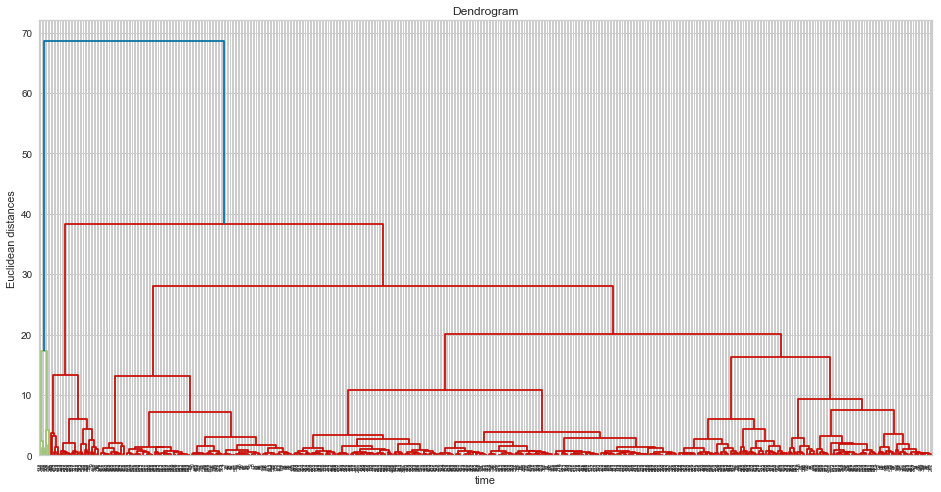

In [55]:
A = df_cpu2.filter(regex='abel')
B = disk_final.filter(regex='abel')
C = df_load2.filter(regex='abel')
D = df_memory2.filter(regex='abel')
mergedf = pd.concat([A,B,C,D], axis=1)
final= mergedf.dropna()
pd.DataFrame.describe(final)
# graph size
import scipy.cluster.hierarchy as sch
plt.figure(1, figsize = (16 ,8))

# creating the dendrogram
dendrogram = sch.dendrogram(sch.linkage(final, method  = "ward"))

# ploting graphabs
plt.title('Dendrogram')
plt.xlabel('time')
plt.ylabel('Euclidean distances')
plt.show()

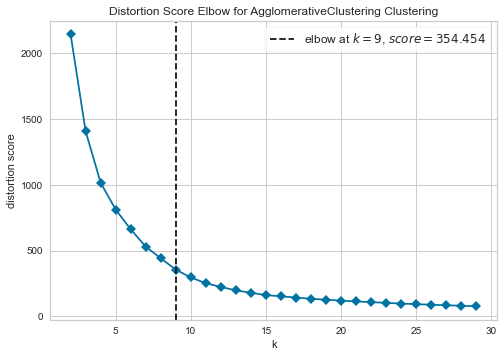

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [56]:
# Import ElbowVisualizer
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
model = AgglomerativeClustering()

# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings=False)
# Fit data to visualizer
visualizer.fit(final)
# Finalize and render figure
visualizer.show()

In [86]:
A1 = time_cpu.filter(regex='abel')
B1 = disk_time.filter(regex='abel')
C1 = time_load.filter(regex='abel')
D1 = time_memory.filter(regex='abel')
timedf = pd.concat([A1,B1,C1,D1], axis=1)
final1= timedf.dropna()
final1

,t.cpu.abel,t.disk.abel,t.load.abel,t.memory.abel
0,1.654085e+09,1654086600,1.654085e+09,1.654085e+09
1,1.654088e+09,1654088400,1.654088e+09,1.654088e+09
2,1.654092e+09,1654090200,1.654092e+09,1.654092e+09
3,1.654096e+09,1654092000,1.654096e+09,1.654096e+09
4,1.654099e+09,1654093800,1.654099e+09,1.654099e+09
...,...,...,...,...
578,1.656166e+09,1655127000,1.656166e+09,1.656166e+09
579,1.656169e+09,1655128800,1.656169e+09,1.656169e+09
580,1.656173e+09,1655130600,1.656173e+09,1.656173e+09
581,1.656176e+09,1655132400,1.656176e+09,1.656176e+09


In [88]:
comparison_column = np.where((final1["t.cpu.abel"] == final1["t.load.abel"]) & (final1["t.cpu.abel"] == final1["t.memory.abel"])  , True, False)
compare_col = pd.DataFrame(comparison_column)
#print(compare_col)
final1["equal"] = compare_col

print(final1)

       t.cpu.abel  t.disk.abel   t.load.abel  t.memory.abel  equal
0    1.654085e+09   1654086600  1.654085e+09   1.654085e+09   True
1    1.654088e+09   1654088400  1.654088e+09   1.654088e+09   True
2    1.654092e+09   1654090200  1.654092e+09   1.654092e+09   True
3    1.654096e+09   1654092000  1.654096e+09   1.654096e+09   True
4    1.654099e+09   1654093800  1.654099e+09   1.654099e+09   True
..            ...          ...           ...            ...    ...
578  1.656166e+09   1655127000  1.656166e+09   1.656166e+09   True
579  1.656169e+09   1655128800  1.656169e+09   1.656169e+09   True
580  1.656173e+09   1655130600  1.656173e+09   1.656173e+09   True
581  1.656176e+09   1655132400  1.656176e+09   1.656176e+09   True
582  1.656180e+09   1655134200  1.656180e+09   1.656180e+09   True

[583 rows x 5 columns]


C:\Users\RISE\AppData\Local\Temp\ipykernel_648\1323373535.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final1["equal"] = compare_col


In [89]:
sum(final1['equal'] == True)

583

In [61]:
final.isnull().sum()

cpu.abel     581
disk.abel      0
dtype: int64

In [15]:
destab = pd.DataFrame.describe(df_cpu2)
trtab = pd.DataFrame.transpose(destab)
destab

,cpu.abel,cpu.adam,cpu.alec,cpu.amir,cpu.ari,cpu.axel,cpu.ayla,cpu.bliss,cpu.carnegie,cpu.dannybrown,cpu.eden,cpu.elis,cpu.emma,cpu.eric,cpu.erin,cpu.etta,cpu.mrhutchinson,cpu.raylenemiles,cpu.thewareings
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,2.718599,1.851693,2.722266,2.566819,1.374535,7.393421,2.522832,3.748678,1.459302,3.348705,3.768459,1.573079,1.241881,2.334573,1.049888,1.735807,0.878230,1.562117,0.965483
std,2.514084,2.016660,2.944182,2.284676,0.994961,9.226705,2.632077,4.506729,1.906889,14.313025,13.812246,2.574508,2.476004,3.419429,3.079044,3.292233,0.746739,2.745612,0.993267
min,1.150000,0.925000,1.100000,1.250000,0.725000,1.600000,1.100000,0.875000,0.550000,0.350000,0.500000,0.450000,0.333333,0.650000,0.350000,0.433333,0.325000,0.450000,0.425000
25%,1.700000,1.306250,1.450000,1.700000,1.050000,2.250000,1.600000,1.200000,0.825000,0.525000,1.000000,0.674663,0.583333,0.950000,0.583333,0.716667,0.550000,0.700000,0.650000
50%,2.050000,1.525000,1.750000,2.050000,1.187500,2.950000,2.000000,1.550000,1.025000,0.625000,1.200000,0.875000,0.716667,1.275000,0.666667,0.866667,0.725000,0.825000,0.775000
75%,2.775000,1.912500,2.600000,2.600000,1.425000,5.000000,2.612500,2.900000,1.375000,0.825000,1.750000,1.175000,0.929167,1.775000,0.783333,1.150000,0.950000,1.062500,0.993750
max,28.300000,45.975000,25.600000,28.650000,19.625000,46.775000,28.300000,18.475000,22.125000,100.000000,100.000000,14.701179,34.083333,29.950000,33.650000,33.650000,8.612500,20.612500,19.137500


In [7]:
cpuMean = trtab.iloc[:,1]
cpuMean.index
#cpuMean.values
#pd.DataFrame(cpuMean)

Index(['cpu.abel', 'cpu.adam', 'cpu.alec', 'cpu.amir', 'cpu.ari', 'cpu.axel',
       'cpu.ayla', 'cpu.bliss', 'cpu.carnegie', 'cpu.dannybrown', 'cpu.eden',
       'cpu.elis', 'cpu.emma', 'cpu.eric', 'cpu.erin', 'cpu.etta',
       'cpu.mrhutchinson', 'cpu.raylenemiles', 'cpu.thewareings'],
      dtype='object')

In [19]:
#plt.plot(trtab.iloc[:,1])
px.bar(cpuMean, x= cpuMean.index, y=cpuMean.values)

In [9]:
cpuStd = trtab.iloc[:,2]
cpuStd

cpu.abel             2.514084
cpu.adam             2.016660
cpu.alec             2.944182
cpu.amir             2.284676
cpu.ari              0.994961
cpu.axel             9.226705
cpu.ayla             2.632077
cpu.bliss            4.506729
cpu.carnegie         1.906889
cpu.dannybrown      14.313025
cpu.eden            13.812246
cpu.elis             2.574508
cpu.emma             2.476004
cpu.eric             3.419429
cpu.erin             3.079044
cpu.etta             3.292233
cpu.mrhutchinson     0.746739
cpu.raylenemiles     2.745612
cpu.thewareings      0.993267
Name: std, dtype: float64

In [10]:
px.scatter(x= cpuStd.index, y=cpuStd.values)
#there is a shift in variation
#the median absolute deviation or the average absolute deviation might be plotted instead. This might be done if there were significant outliers in the data and a more robust measure of scale than the standard deviation was desired.

In [12]:
px.scatter(df2['cpu.abel'])

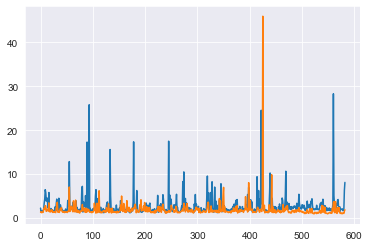

In [6]:
plt.plot(df2['cpu.abel'])
plt.plot(df2['cpu.adam'])
plt.show()

In [160]:
df2.iloc[:,0:2]

,cpu.abel,cpu.adam
0,2.250,1.3500
1,1.450,1.4250
2,1.650,1.2000
3,1.600,1.3000
4,1.350,1.2750
...,...,...
578,1.675,1.0625
579,1.800,1.1750
580,2.025,1.0375
581,6.300,1.5375


In [20]:
import plotly.express as px
#df = px.data.df2['cpu.abel']
#fig = px.line(df2['cpu.abel'], y='cpu.abel')
fig = px.line(df2.iloc[:,0:4])
fig.show()

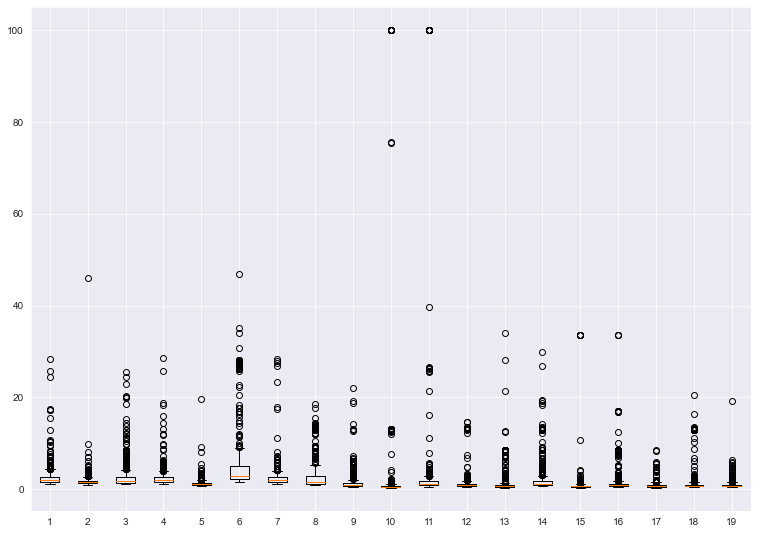

In [18]:
# Creating box plot
# Creating axes instance
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(df2.iloc[:,0:19])
# show plot
plt.show()

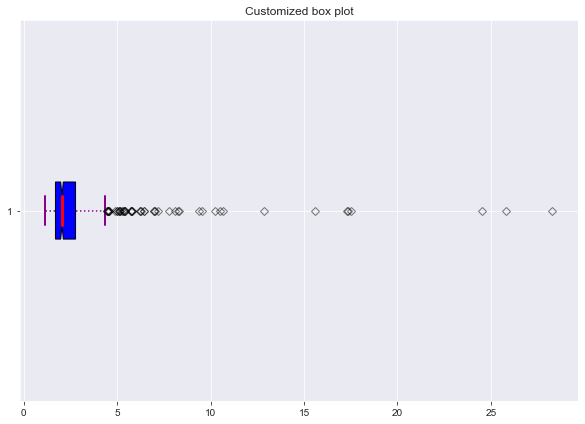

In [7]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(df2.iloc[:,0], patch_artist = True,
                notch ='True', vert = 0)

colors = ['#0000FF', '#00FF00',
          '#FFFF00', '#FF00FF']

for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

# changing color and linewidth of
# whiskers
for whisker in bp['whiskers']:
    whisker.set(color ='#8B008B',
                linewidth = 1.5,
                linestyle =":")

# changing color and linewidth of
# caps
for cap in bp['caps']:
    cap.set(color ='#8B008B',
            linewidth = 2)

# changing color and linewidth of
# medians
for median in bp['medians']:
    median.set(color ='red',
               linewidth = 3)

# changing style of fliers
for flier in bp['fliers']:
    flier.set(marker ='D',
              color ='#e7298a',
              alpha = 0.5)

# x-axis labels
#ax.set_yticklabels(['cpu.abel', 'cpu.adam', 'cpu.alec', 'cpu.amir', 'cpu.ari', 'cpu.axel', 'cpu.ayla', 'cpu.bliss', 'cpu.carnegie',
               #'cpu.dannybrown', 'cpu.eden', 'cpu.elis', 'cpu.emma', 'cpu.eric', 'cpu.erin', 'cpu.etta', 'cpu.mrhutchinson',
               #'cpu.raylenemiles', 'cpu.thewareings'])

# Adding title
plt.title("Customized box plot")

# Removing top axes and right axes
# ticks
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()

# show plot
plt.show()

In [7]:
#import plotly.express as px
df = px.data.tips()
fig = px.box(df2, x="cpu.abel")
fig.show()

In [48]:
#pip install dash
#var = app.py
from dash import Dash, dcc, html, Input, Output
from jupyter_dash import JupyterDash
#import jupyterlab_dash
#from jupyterlab_dash import AppViewer
import dash_core_components as dcc
import dash
import dash_html_components as html
from dash.dependencies import Input, Output

#viewer = AppViewer()
#import plotly.express as px
pd.options.plotting.backend = "plotly"
app = JupyterDash(__name__)

app.layout = html.Div([
    html.H4("Analysis of the cpu time", style={'color': 'white', 'fontSize': 24}),
    html.P("x-axis:"),
    dcc.Checklist(style={'color': 'white', 'fontSize': 12},
        id='box-plots-x-x-axis',
        options=['cpu.abel', 'cpu.adam', 'cpu.alec', 'cpu.amir', 'cpu.ari', 'cpu.axel', 'cpu.ayla', 'cpu.bliss', 'cpu.carnegie',
               'cpu.dannybrown', 'cpu.eden', 'cpu.elis', 'cpu.emma', 'cpu.eric', 'cpu.erin', 'cpu.etta', 'cpu.mrhutchinson',
               'cpu.raylenemiles', 'cpu.thewareings'],
        value=['cpu.abel'],
        inline=True
    ),
    html.P("y-axis:"),
    dcc.RadioItems(
        id='box-plots-x-y-axis',
        #options=['time', 'tip', 'size'],
        #value='total_bill',
        #inline=True
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"),
    Input("box-plots-x-x-axis", "value"),
    Input("box-plots-x-y-axis", "value"))

def generate_chart(x1, y1):
    #df = px.data.tips() # replace with your own data source
    fig3 = px.box(df2, x=x1, y=y1)
    return fig3

#if __name__ == "__main__":
app.run_server(mode='inline', port = 8090, dev_tools_ui=True, #debug=True,
              dev_tools_hot_reload =True, threaded=True)
#viewer.show(app)

C:\Users\RISE\AppData\Local\Temp\ipykernel_6036\4164743066.py:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\RISE\AppData\Local\Temp\ipykernel_6036\4164743066.py:9: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [90]:
#pip install dash
#var = app.py
from dash import Dash, dcc, html, Input, Output
from jupyter_dash import JupyterDash
#import jupyterlab_dash
#from jupyterlab_dash import AppViewer
import dash_core_components as dcc
import dash
import dash_html_components as html
from dash.dependencies import Input, Output

#viewer = AppViewer()
#import plotly.express as px
pd.options.plotting.backend = "plotly"
app = JupyterDash(__name__)

app.layout = html.Div([
    html.H4("Analysis of the cpu time", style={'color': 'white', 'fontSize': 24}),
    html.P("x-axis:"),
    dcc.Checklist(style={'color': 'white', 'fontSize': 12},
        id='box-plots-x-x-axis',
        options=['cpu.abel', 'cpu.adam', 'cpu.alec', 'cpu.amir', 'cpu.ari', 'cpu.axel', 'cpu.ayla', 'cpu.bliss', 'cpu.carnegie',
               'cpu.dannybrown', 'cpu.eden', 'cpu.elis', 'cpu.emma', 'cpu.eric', 'cpu.erin', 'cpu.etta', 'cpu.mrhutchinson',
               'cpu.raylenemiles', 'cpu.thewareings'],
        value=['cpu.abel'],
        inline=True
    ),
    html.P("y-axis:"),
    dcc.RadioItems(
        id='box-plots-x-y-axis',
        #options=['time', 'tip', 'size'],
        #value='total_bill',
        #inline=True
    ),
    dcc.Graph(id="graph"),
])


@app.callback(
    Output("graph", "figure"),
    Input("box-plots-x-x-axis", "value"),
    Input("box-plots-x-y-axis", "value"))

def generate_chart(x2, y2):
    #df = px.data.tips() # replace with your own data source
    fig4 = px.histogram(df2, x=x2, y=y2,
                        marginal="box"  # or violin, rug
                        )
    return fig4

#if __name__ == "__main__":
app.run_server(mode='inline', port = 8090, dev_tools_ui=True, #debug=True,
              dev_tools_hot_reload =True, threaded=True)

C:\Users\RISE\AppData\Local\Temp\ipykernel_648\4026194321.py:7: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\RISE\AppData\Local\Temp\ipykernel_648\4026194321.py:9: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [8]:
#pip install varclushi
from varclushi import VarClusHi
vc = VarClusHi(df2, maxeigval2=1, maxclus=None)
vc.varclus()

In [9]:
vc.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,5,1.562563,0.951803,0.312513
1,1,3,1.944211,0.712543,0.648070
2,2,3,1.251890,0.983543,0.417297
3,3,3,1.222159,0.982647,0.407386
4,4,3,1.293306,0.878113,0.431102
5,5,1,1.000000,0.000000,1.000000
6,6,1,1.000000,0.000000,1.000000


In [10]:
vc.rsquare
# Select one variable from each cluster which is having minimum RS_RATIO.

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,cpu.amir,0.296220,0.008465,0.709788
1,0,cpu.axel,0.394974,0.049149,0.636300
2,0,cpu.bliss,0.438436,0.042346,0.586395
3,0,cpu.raylenemiles,0.260904,0.017326,0.752128
4,0,cpu.thewareings,0.172030,0.013595,0.839382
5,1,cpu.eden,0.706135,0.005115,0.295376
6,1,cpu.erin,0.772528,0.002208,0.227975
7,1,cpu.etta,0.465548,0.002440,0.535759
8,2,cpu.adam,0.298619,0.018599,0.714673
9,2,cpu.elis,0.348484,0.021525,0.665848


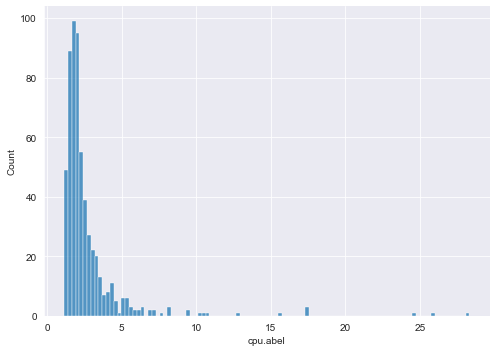

In [18]:
# matplotlib histogram
sb.displot(
  data=df2,
  x="cpu.abel",
  kind="hist",
  aspect=1.4
)

In [41]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(df2) # fitting the data to the object
distances,indices=nbrs.kneighbors(df2)
distances

array([[0.00000000e+00, 9.92541630e-01],
       [1.19209290e-07, 1.01451275e+00],
       [0.00000000e+00, 1.22814223e+00],
       ...,
       [0.00000000e+00, 9.21850871e-01],
       [4.76837158e-07, 1.54507298e+01],
       [0.00000000e+00, 4.82999705e+00]])

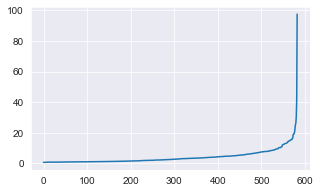

In [8]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show() # showing the plot

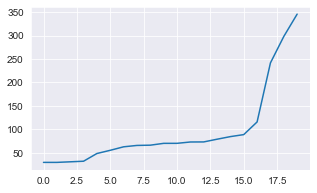

In [44]:
from sklearn.neighbors import NearestNeighbors  # importing the library
X = pd.DataFrame.transpose(df2)
neighb = NearestNeighbors(n_neighbors=2)  # creating an object of the NearestNeighbors class
nbrs = neighb.fit(X)  # fitting the data to the object
distances, indices = nbrs.kneighbors(X)
# Sort and plot the distances results
distances = np.sort(distances, axis=0)  # sorting the distances
distances = distances[:, 1]  # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5, 3)  # setting the figure size
plt.plot(distances)  # plotting the distances
plt.show()

In [43]:
distances

array([[0.00000000e+00, 2.92488843e+01],
       [0.00000000e+00, 2.92488843e+01],
       [0.00000000e+00, 3.04741010e+01],
       [0.00000000e+00, 3.17412702e+01],
       [0.00000000e+00, 4.81914623e+01],
       [0.00000000e+00, 5.50468551e+01],
       [0.00000000e+00, 6.24847928e+01],
       [0.00000000e+00, 6.54304432e+01],
       [0.00000000e+00, 6.59689025e+01],
       [0.00000000e+00, 6.98797451e+01],
       [0.00000000e+00, 6.99107805e+01],
       [0.00000000e+00, 7.27683213e+01],
       [0.00000000e+00, 7.29105349e+01],
       [0.00000000e+00, 7.86978055e+01],
       [6.74349576e-07, 8.42560812e+01],
       [1.90734863e-06, 8.85219439e+01],
       [1.90734863e-06, 1.15552314e+02],
       [2.69739830e-06, 2.41576664e+02],
       [2.69739830e-06, 2.97996169e+02],
       [5.39479661e-06, 3.45621845e+02]])

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
X = pd.DataFrame.transpose(df2)
dbscan = DBSCAN(eps=100).fit(X)
labels = dbscan.labels_
labels
# check unique clusters
set(dbscan.labels_)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 1
Estimated number of noise points: 4


In [19]:
X["DBSCAN_clusters"] = dbscan.labels_
X.head()

,0,1,2,3,4,5,6,7,8,9,...,574,575,576,577,578,579,580,581,582,DBSCAN_clusters
cpu.abel,2.25,1.450,1.65,1.600,1.350,1.75,1.950,3.400,4.30,6.450,...,1.9750,2.00,1.9750,2.100,1.6750,1.8000,2.0250,6.3000,8.1000,0
cpu.adam,1.35,1.425,1.20,1.300,1.275,1.30,1.925,2.300,2.00,2.825,...,1.1125,1.00,1.1125,0.975,1.0625,1.1750,1.0375,1.5375,1.8625,0
cpu.alec,1.75,1.450,1.35,1.150,1.350,1.40,1.300,1.850,2.60,1.850,...,1.4000,1.45,1.7000,1.525,1.7500,1.3500,1.6000,7.5500,5.4500,0
cpu.amir,1.35,1.500,1.60,2.550,1.250,1.60,3.300,2.350,3.75,2.100,...,1.5750,2.00,1.8750,1.700,1.7250,1.7000,1.8250,2.7500,4.5500,0
cpu.ari,1.55,1.425,1.25,1.175,0.750,1.05,0.775,1.025,2.70,1.275,...,1.1750,1.25,1.0500,1.050,1.1375,1.1125,1.2750,19.6250,1.7750,0


In [10]:
#df2['DBSCAN_clusters'] = df2['DBSCAN_clusters'].astype("str")
X.loc[X['DBSCAN_clusters'] == -1]

,0,1,2,3,4,5,6,7,8,9,...,574,575,576,577,578,579,580,581,582,DBSCAN_clusters
cpu.axel,3.000,1.950,1.800,2.05,3.10,1.960784,4.150,26.300,17.700,1.850,...,2.0750,3.000,2.1500,2.5250,2.9000,2.700,3.050,2.300,3.800,-1
cpu.bliss,1.150,1.275,1.000,0.95,1.50,1.050000,2.825,1.325,13.275,1.675,...,1.2625,1.200,1.4375,1.2625,1.0375,1.025,1.700,1.575,1.675,-1
cpu.dannybrown,0.825,0.950,1.075,1.05,0.35,0.875000,0.750,0.625,1.500,1.225,...,0.5875,0.525,0.5250,0.5500,0.4375,0.475,0.550,0.600,1.725,-1
cpu.eden,1.250,2.650,2.600,1.30,0.95,1.450000,1.250,1.200,1.900,0.700,...,1.3250,1.075,1.2250,1.4000,1.0750,1.025,1.375,0.800,1.150,-1


In [ ]:
px.scatter_3d(data_frame=df2,x='cpu.abel',y='cpu.adam',z='Age',color='DBSCAN_clusters',template='plotly_dark',
             title='3D Scatter plot for DBSCAN Clusters')

In [10]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels2 = dbscan.labels_
labels2[labels2== -1]

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

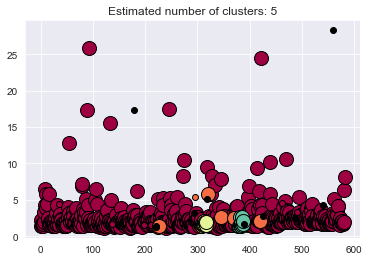

In [55]:
# Black removed and is used for noise instead.
unique_labels = set(labels2)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels2 == k

    xy = df2.iloc[class_member_mask & core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        #xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = df2.iloc[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy.iloc[:, 0],
        #xy.iloc[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

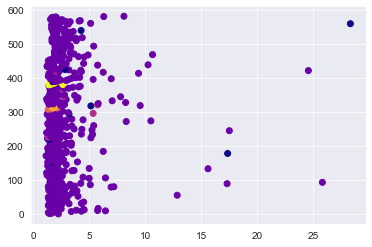

In [69]:
# Plot the clusters
plt.scatter(df2.iloc[:,0], range(0,583), c = labels2, cmap= "plasma") # plotting the clusters

In [82]:
for k in range(0,len(labels2)):
    if k == -1:
        col = [0, 0, 0, 1]
    labels2 == k
    fig=px.scatter(x=df2.iloc[:,0], y=range(0,583),color=labels2)
fig.show()

C:\Users\RISE\Desktop\Sara\test\venv\lib\site-packages\plotly\express\_core.py:229: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [83]:
px.scatter(x=df2.iloc[:,0], y=range(0,583),color=labels2, color_discrete_map="plasma")

In [ ]:
# Black removed and is used for noise instead.
import plotly.graph_objects as go
fig = go.Figure()
unique_labels = set(labels2)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels2 == k

    xy = df2.iloc[class_member_mask & core_samples_mask]
    fig.add_trace(
         go.Scatter( y = xy.iloc[:,0], #y = xy.iloc[:,1],
                      mode='markers')
    )

    xy = df2.iloc[class_member_mask & ~core_samples_mask]
    fig.add_trace(
        go.Scatter(y = xy.iloc[:,0], #y = xy.iloc[:,1],
                    mode='markers')
    )


#fig.update_traces(marker=dict(size=12,
                            #  line=dict(width=2,
                             #           color='DarkSlateGrey')),
               #   selector=dict(mode='markers'))
fig.show()

#plt.title("Estimated number of clusters: %d" % n_clusters_)
#plt.show()

In [61]:
unique_labels = set(labels2)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
np.linspace(0, 1, len(unique_labels))

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

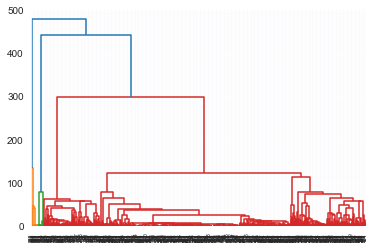

In [27]:
#Hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_data = linkage(df2, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

In [34]:
from sklearn.cluster import AgglomerativeClustering
clustering_model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clustering_model.fit(df2)
label = clustering_model.labels_
label

array([1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1, 1, 3, 1, 3, 1, 3, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 3, 3, 1,
       3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 3, 3, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1,
       3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 3, 3, 1, 1,
       1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,

In [16]:
df2["HCL"] = label
#df2['HCL'] = df2['HCL'].astype("str")
df2.loc[df2['HCL'] == 1]

NameError: name 'label' is not defined

In [64]:
#pip install varclushi
from varclushi import VarClusHi
vc = VarClusHi(df2,maxeigval2=1,maxclus=None)
vc.varclus()

In [65]:
vc.info

,Cluster,N_Vars,Eigval1,Eigval2,VarProp
0,0,5,1.562563,0.951803,0.312513
1,1,3,1.944211,0.712543,0.648070
2,2,3,1.251890,0.983543,0.417297
3,3,3,1.222159,0.982647,0.407386
4,4,3,1.293306,0.878113,0.431102
5,5,1,1.000000,0.000000,1.000000
6,6,1,1.000000,0.000000,1.000000


In [69]:
vc.rsquare
# Select one variable from each cluster which is having minimum RS_RATIO.

,Cluster,Variable,RS_Own,RS_NC,RS_Ratio
0,0,cpu.amir,0.296220,0.008465,0.709788
1,0,cpu.axel,0.394974,0.049149,0.636300
2,0,cpu.bliss,0.438436,0.042346,0.586395
3,0,cpu.raylenemiles,0.260904,0.017326,0.752128
4,0,cpu.thewareings,0.172030,0.013595,0.839382
5,1,cpu.eden,0.706135,0.005115,0.295376
6,1,cpu.erin,0.772528,0.002208,0.227975
7,1,cpu.etta,0.465548,0.002440,0.535759
8,2,cpu.adam,0.298619,0.018599,0.714673
9,2,cpu.elis,0.348484,0.021525,0.665848


In [56]:
(1-0.296220)/(1-0.008465)

0.7097883584543159

TypeError: Linkage matrix 'Z' must contain doubles.

In [29]:
Cl0 = label[label == 0]
len(Cl0)
Cl0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [26]:
Cl1 = label[label == 1]
len(Cl1)

1

In [54]:
Cl2 = label[label == 2]
len(Cl2)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [50]:
Cl3 = label[label == 3]
len(Cl3)

98

In [6]:
timeDf = pd.DataFrame()
for j in range(0,19):
    time0 = []
    for i in range(0,583):
        time0.append(df.iloc[j]['values'][i][0])
    timeDf.insert(j, str(j), time0, True)
timeDf.columns = ['time.abel', 'time.adam', 'time.alec', 'time.amir', 'time.ari', 'time.axel', 'time.ayla', 'time.bliss', 'time.carnegie',
               'time.dannybrown', 'time.eden', 'time.elis', 'time.emma', 'time.eric', 'time.erin', 'time.etta', 'time.mrhutchinson',
               'time.raylenemiles', 'time.thewareings']
timeDf

,time.abel,time.adam,time.alec,time.amir,time.ari,time.axel,time.ayla,time.bliss,time.carnegie,time.dannybrown,time.eden,time.elis,time.emma,time.eric,time.erin,time.etta,time.mrhutchinson,time.raylenemiles,time.thewareings
0,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800
1,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400
2,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000
3,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600
4,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1656165600,1656165600,1656169200,1656165600,1656165600,1656169200,1656169200,1656165600,1656165600,1656165600,1656165600,1656165600,1656230400,1656165600,1656165600,1656165600,1656403200,1656165600,1656403200
579,1656169200,1656169200,1656172800,1656169200,1656169200,1656172800,1656172800,1656169200,1656169200,1656169200,1656169200,1656169200,1656234000,1656169200,1656169200,1656169200,1656406800,1656169200,1656406800
580,1656172800,1656172800,1656176400,1656172800,1656172800,1656176400,1656176400,1656172800,1656172800,1656172800,1656172800,1656172800,1656237600,1656172800,1656172800,1656172800,1656410400,1656172800,1656410400
581,1656176400,1656176400,1656180000,1656176400,1656176400,1656180000,1656180000,1656176400,1656176400,1656176400,1656176400,1656176400,1656241200,1656176400,1656176400,1656176400,1656414000,1656176400,1656414000


In [9]:
#Find differece
timeDf['New'] = timeDf.apply(lambda x: x['time.abel'] if x['time.abel'] ==
                     x['time.axel']  else np.nan, axis=1)

# printing the dataframe
print(timeDf)
timeDf

      time.abel   time.adam   time.alec   time.amir    time.ari   time.axel  \
0    1654084800  1654084800  1654084800  1654084800  1654084800  1654084800   
1    1654088400  1654088400  1654088400  1654088400  1654088400  1654088400   
2    1654092000  1654092000  1654092000  1654092000  1654092000  1654092000   
3    1654095600  1654095600  1654095600  1654095600  1654095600  1654095600   
4    1654099200  1654099200  1654099200  1654099200  1654099200  1654099200   
..          ...         ...         ...         ...         ...         ...   
578  1656165600  1656165600  1656169200  1656165600  1656165600  1656169200   
579  1656169200  1656169200  1656172800  1656169200  1656169200  1656172800   
580  1656172800  1656172800  1656176400  1656172800  1656172800  1656176400   
581  1656176400  1656176400  1656180000  1656176400  1656176400  1656180000   
582  1656180000  1656180000  1656183600  1656180000  1656180000  1656183600   

      time.ayla  time.bliss  time.carnegie  time.da

,time.abel,time.adam,time.alec,time.amir,time.ari,time.axel,time.ayla,time.bliss,time.carnegie,time.dannybrown,time.eden,time.elis,time.emma,time.eric,time.erin,time.etta,time.mrhutchinson,time.raylenemiles,time.thewareings,New
0,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1654084800,1.654085e+09
1,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1654088400,1.654088e+09
2,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1654092000,1.654092e+09
3,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1654095600,1.654096e+09
4,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1654099200,1.654099e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1656165600,1656165600,1656169200,1656165600,1656165600,1656169200,1656169200,1656165600,1656165600,1656165600,1656165600,1656165600,1656230400,1656165600,1656165600,1656165600,1656403200,1656165600,1656403200,NaN
579,1656169200,1656169200,1656172800,1656169200,1656169200,1656172800,1656172800,1656169200,1656169200,1656169200,1656169200,1656169200,1656234000,1656169200,1656169200,1656169200,1656406800,1656169200,1656406800,NaN
580,1656172800,1656172800,1656176400,1656172800,1656172800,1656176400,1656176400,1656172800,1656172800,1656172800,1656172800,1656172800,1656237600,1656172800,1656172800,1656172800,1656410400,1656172800,1656410400,NaN
581,1656176400,1656176400,1656180000,1656176400,1656176400,1656180000,1656180000,1656176400,1656176400,1656176400,1656176400,1656176400,1656241200,1656176400,1656176400,1656176400,1656414000,1656176400,1656414000,NaN


In [ ]:
len(df.iloc[18]['values'])
#len(df.iloc[0]['values'])
#df.iloc[18]['values']

In [18]:
cpu = pd.DataFrame(cpu)
cpu.columns = ['cpu.abel']
cpu
px.scatter(cpu)
#c = round(int(float('2.56789')), 2)
#c

In [115]:
from IPython.core.display_functions import display
abel = pd.concat([time, cpu], axis=1, join='inner')
display(abel)

,Unix.time,cpu.abel
0,1654084800,2.250
1,1654088400,1.450
2,1654092000,1.650
3,1654095600,1.600
4,1654099200,1.350
...,...,...
644,1656403200,2.325
645,1656406800,1.900
646,1656410400,2.800
647,1656414000,3.250


In [75]:
abel
type(abel)

pandas.core.frame.DataFrame

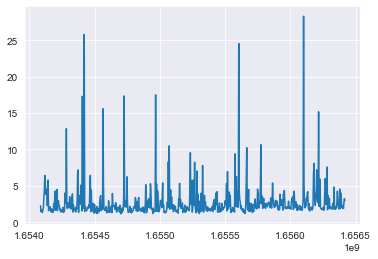

In [118]:
plt.plot(abel['Unix.time'], abel['cpu.abel'])
plt.show()

In [ ]:
print('cpu: ',type(cpu))

In [ ]:
df.iloc[1]['values'][1][1]

In [ ]:
df

In [ ]:
data = pd.read_excel(filename, sheet_name=4, skiprows=4)
data.head(10)

In [ ]:
data1 = data.loc[:, pd.notnull(data).sum()>len(data)*.75]
data1
data2 = data1.drop(['Build', 'TestManipulator'], axis = 1)
data2

In [ ]:
data2 = data2.loc[:,data2.apply(pd.Series.nunique) != 1]
data3 = data2.loc[:,~data2.apply(lambda x: x.duplicated(),axis=1).all()].copy()

In [ ]:
data_imp = data3.fillna(data3.mean())
pd.notna(data_imp).sum()

In [ ]:
cor_matrix = data_imp.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.97)]
data_final = data_imp.drop(data_imp[to_drop], axis=1)
data_final.index = data['Build']
data_final

In [ ]:
def desc_fun(dat,x):
 filter_list = [col for col in dat if col.startswith(x)]
 filter_dat = dat[filter_list]
 print(filter_dat.describe())

In [ ]:
desc_fun(data_final,'servots0')

In [ ]:
x = len(data_final.index)
y = data_final.iloc[:,[1]]

In [ ]:
fig = plt.scatter(x = list(range(1,437)), y = data_final.iloc[:,[1]])

In [ ]:
z = data_final.iloc[:,[1]].mean()

In [ ]:
#Linear correlation
lin_cor = data_final.corr(method= 'pearson')
lin_cor.style.background_gradient(cmap='coolwarm')
sb.heatmap(lin_cor, cmap="Blues", annot=True)

In [ ]:
model = IsolationForest( max_samples='auto', contamination='auto',max_features=1.0)
model.fit(data_final)
data_final['scores']=model.decision_function(data_final)
data_final['anomaly']=model.predict(data_final)
data_final.head(20)
anomaly=data_final.loc[data_final['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly_index)